<a href="https://colab.research.google.com/github/muditbit/Diabetic-logistic/blob/master/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing some neccesary libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
#loading the dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Summarizing or getting some insight of the dataset that to be worked on

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking the dataset for null values 

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Diabetes Outcomes Value Count')

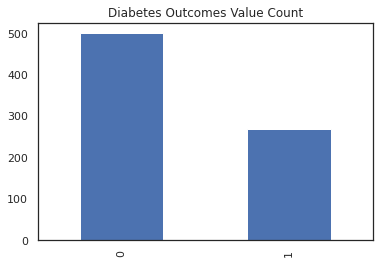

In [ ]:
#visualing the the balance of data i.e. no of true and false values or 0-1 values etc

df.Outcome.value_counts().plot(kind = 'bar').set_title('Diabetes Outcomes Value Count')

In [ ]:
df.describe().round(decimals=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


(9.5, -0.5)

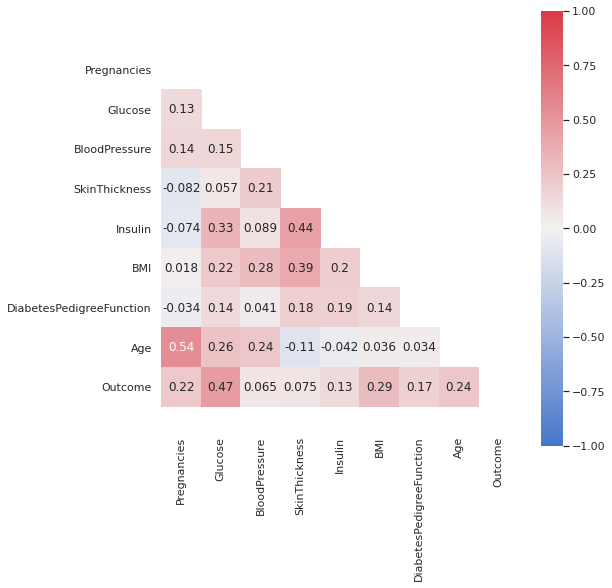

In [ ]:
#creating HeatMap of visualization it generates correlation matrix
sns.set(style='white')

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#to Control the fig size
fig, ax = plt.subplots(figsize=(8,8))

cmap = sns.diverging_palette(255, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

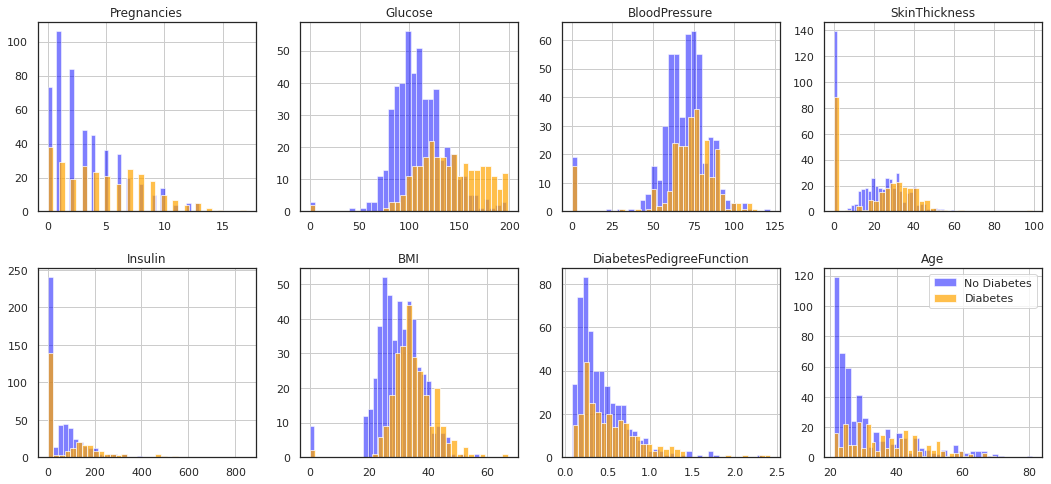

In [ ]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)





there are zero values in Glucose, BloodPressure, SkinThickness, Insulin, BMI as outliers

We need to fix these outlliers with the median of the column.

In [ ]:
#Glucose
df.Glucose.replace(0, np.nan, inplace=True)
df.Glucose.replace(np.nan, df['Glucose'].median(), inplace=True)

#BloodPressure
df.BloodPressure.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(np.nan, df['BloodPressure'].median(), inplace=True)

#skinThickness
df.SkinThickness.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(np.nan, df['SkinThickness'].median(), inplace=True)

#insulin
df.Insulin.replace(0, np.nan, inplace=True)
df.Insulin.replace(np.nan, df['Insulin'].median(), inplace=True)

#BMI
df.BMI.replace(0, np.nan, inplace=True)
df.BMI.replace(np.nan, df['BMI'].median(), inplace=True)

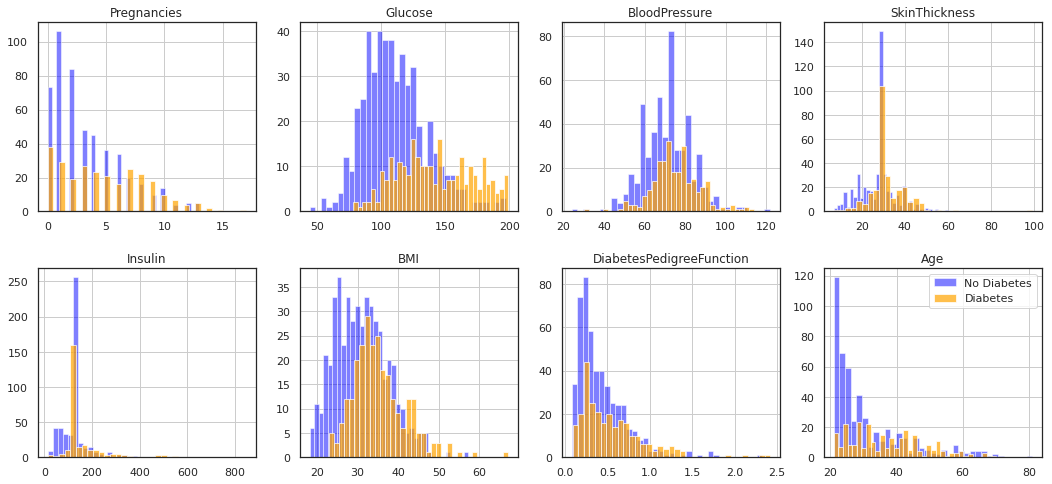

In [ ]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)





In [ ]:
#Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm = scaler.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
df_norm = pd.DataFrame({'Pregnancies': norm[ :, 0], 'Glucose' : norm[ :, 1], 'BloodPressure' : norm[ :, 2], 'SkinThickness' : norm[ :, 3],
                       'Insulin' : norm[ :, 4], 'BMI' : norm[ :, 5], 'DiabetesPedigreeFunction' : norm[ :, 5], 'Age' : norm[ :, 6]}, 
                       columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
df_norm['Outcome'] = df['Outcome']

# split
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,
                                                    test_size = 0.3)

os = SMOTE(random_state=42)

columns = x_train.columns

os_data_x,os_data_y = os.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

#Random Forest Classifier

rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(os_data_x, os_data_y)
rf_predict = rf_model.predict(x_test)
rf_cm = confusion_matrix(y_test, rf_predict)
rf_score = rf_model.best_score_


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree

dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(os_data_x, os_data_y)
dt_predict = dt_model.predict(x_test)
dt_cm = confusion_matrix(y_test, dt_predict)
dt_score = dt_model.best_score_


In [ ]:
# xgb
import xgboost as xgb
xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]}
xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), xgb_params, cv=5)
xgb_model.fit(os_data_x, os_data_y)
xgb_predict = xgb_model.predict(x_test.values)
xgb_cm = confusion_matrix(y_test, xgb_predict)
xgb_score = xgb_model.best_score_
xgb_score

0.8167728674203495

In [ ]:
# svc

from sklearn.svm import SVC
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(os_data_x, os_data_y)
svc_predict = svc_model.predict(x_test)
svc_cm = confusion_matrix(y_test, svc_predict)
svc_score = svc_model.best_score_
print(svc_score)

0.7822918807810895


In [ ]:
# knn

from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(os_data_x, os_data_y)
knn_predict = knn_model.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_predict)
knn_score = knn_model.best_score_
print(knn_score)

0.8153340184994861


In [ ]:
!pip install catboost

In [ ]:
# cb


from catboost import CatBoostClassifier
cb_params = {'learning_rate': [0.01, 0.05, 0.1],
             'depth': [3, 5, 7, 9]}
cb_model = GridSearchCV(CatBoostClassifier(verbose=False), cb_params, cv=5)
cb_model.fit(os_data_x, os_data_y)
cb_predict = cb_model.predict(x_test)
cb_cm = confusion_matrix(y_test, cb_predict)
cb_score = cb_model.best_score_

In [ ]:
# Deciding the winner

mdls = {'DecisionTree': dt_score*100,
        'CatBoost':cb_score*100,
        'XGBClassifier':xgb_score*100,
        'SVM':svc_score*100,
        'RandomForest':rf_score*100,
        'KNN':knn_score*100}

In [ ]:
mdls


{'CatBoost': 83.9660842754368,
 'DecisionTree': 79.67112024665981,
 'KNN': 81.5334018499486,
 'RandomForest': 82.67728674203495,
 'SVM': 78.22918807810895,
 'XGBClassifier': 81.67728674203495}

In [ ]:
win = pd.DataFrame(list(mdls.items()),columns=['Model','Score'])

In [ ]:
win.sort_values(by=['Score'],inplace=True,ascending=False)

In [ ]:
win

,Model,Score
1,CatBoost,83.966084
4,RandomForest,82.677287
2,XGBClassifier,81.677287
5,KNN,81.533402
0,DecisionTree,79.671120
3,SVM,78.229188


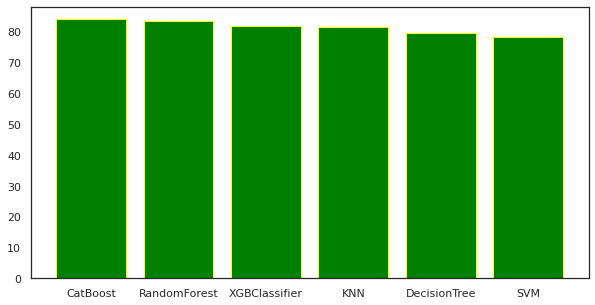

In [ ]:
plt.figure(figsize= (10,5))
plt.bar(win.Model,win.Score, align = 'center', width =0.8,
        color = 'green',edgecolor='yellow',linewidth=1)
plt.show()

In [ ]:
!pip freeze


absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
catboost==0.26
certifi==2021.5.30
cffi==1.14.6
cftime==1.5.0
chardet==3.0.4
charset-normalizer==2.0.2
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distri